In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset from CSV
# Step 1: Load the dataset from CSV
try:
    data = pd.read_csv('/content/marketing_AB.csv')
except FileNotFoundError:
    print("Error: 'marketing_data.csv' not found in the current directory.")
    exit(1)
except pd.errors.ParserError:
    print("Error: Invalid CSV file format. Ensure the file has the correct columns.")
    exit(1)

data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [ ]:
# Step 2: Verify required columns
required_columns = ['test group', 'converted', 'total ads']
if not all(col in data.columns for col in required_columns):
    print(f"Error: CSV file must contain columns: {required_columns}")
    exit(1)


In [ ]:
# Step 3: Ensure 'converted' column is boolean
try:
    data['converted'] = data['converted'].astype(bool)
except ValueError:
    print("Error: 'converted' column contains invalid values. It should contain only True/False.")
    exit(1)


In [ ]:
# Step 4: Objective 1 - Analyze conversion rates by group
# Calculate conversion rates (mean of boolean 'converted' gives proportion of True)
conversion_rates = data.groupby('test group')['converted'].mean()
group_counts = data['test group'].value_counts()
print("\nObjective 1: Conversion Rates by Group")
print("-------------------------------------")
print("Conversion Rates:")
print(conversion_rates)
print("\nNumber of Users per Group:")
print(group_counts)



Objective 1: Conversion Rates by Group
-------------------------------------
Conversion Rates:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Number of Users per Group:
test group
ad     564577
psa     23524
Name: count, dtype: int64


In [ ]:
# Step 4: Objective 1 - Analyze conversion rates by group
# Calculate conversion rates (mean of boolean 'converted' = proportion of True)
conversion_rates = data.groupby('test group')['converted'].mean()
group_counts = data['test group'].value_counts()
print("\nObjective 1: Conversion Rates by Group")
print("-------------------------------------")
print("Conversion Rates:")
print(conversion_rates)
print("\nNumber of Users per Group:")
print(group_counts)
print("\nNote: Small PSA group size (2 users) may limit reliability of results (Sampling/CLT).")


Objective 1: Conversion Rates by Group
-------------------------------------
Conversion Rates:
test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Number of Users per Group:
test group
ad     564577
psa     23524
Name: count, dtype: int64

Note: Small PSA group size (2 users) may limit reliability of results (Sampling/CLT).


In [ ]:
# Step 5: Explore data distribution (aligned with Data Distributions)
# Summary statistics for total_ads
print("\nData Distribution: Summary of Total Ads")
print("--------------------------------------")
print(data['total ads'].describe())



Data Distribution: Summary of Total Ads
--------------------------------------
count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64


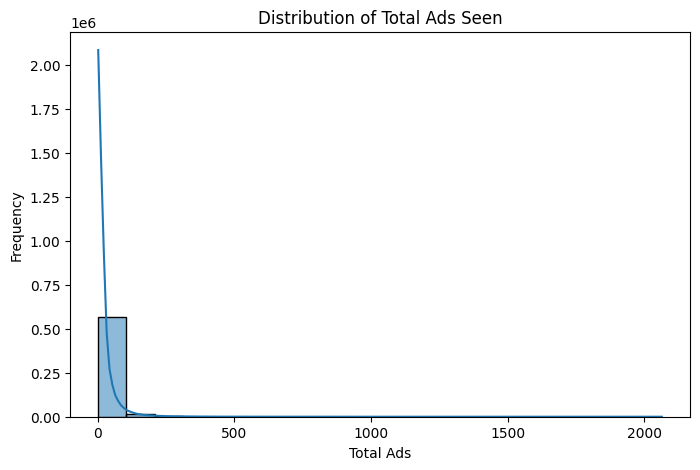

In [ ]:
# Plot distribution of total_ads
plt.figure(figsize=(8, 5))
sns.histplot(data['total ads'], bins=20, kde=True)
plt.title('Distribution of Total Ads Seen')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.savefig('total_ads_distribution.png')

plt.show()

In [ ]:
# Step 6: Objective 2 - Estimate potential revenue
# Assume $10 revenue per conversion (estimation)
revenue_per_conversion = 10
ad_conversions = data[data['test group'] == 'ad']['converted'].sum()
psa_conversions = data[data['test group'] == 'psa']['converted'].sum()
ad_revenue = ad_conversions * revenue_per_conversion
psa_revenue = psa_conversions * revenue_per_conversion

In [ ]:
# Calculate conversion rate lift
ad_rate = conversion_rates.get('ad', 0)
psa_rate = conversion_rates.get('psa', 0)
lift = ((ad_rate - psa_rate) / psa_rate * 100) if psa_rate > 0 else float('inf')

print("\nStep 6: Objective 2 - Revenue Estimation")
print("---------------------------------------")
print(f"Ad Group Conversions: {ad_conversions}")
print(f"PSA Group Conversions: {psa_conversions}")
print(f"Ad Group Revenue: ${ad_revenue:.2f}")
print(f"PSA Group Revenue: ${psa_revenue:.2f}")
print(f"Conversion Rate Lift: {lift:.2f}% (Note: 'inf' indicates zero PSA conversions)")


Step 6: Objective 2 - Revenue Estimation
---------------------------------------
Ad Group Conversions: 14423
PSA Group Conversions: 420
Ad Group Revenue: $144230.00
PSA Group Revenue: $4200.00
Conversion Rate Lift: 43.09% (Note: 'inf' indicates zero PSA conversions)


In [ ]:
# Step 7: Objective 3 - Assess statistical significance (Chi-square test)
# Create contingency table for Chi-square test
contingency_table = pd.crosstab(data['test group'], data['converted'])
print("\nStep 7: Objective 3 - Statistical Significance (Chi-square Test)")
print("-------------------------------------------------------------")
print("Contingency Table:")
print(contingency_table)


Step 7: Objective 3 - Statistical Significance (Chi-square Test)
-------------------------------------------------------------
Contingency Table:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [ ]:
# Perform Chi-square test of independence
try:
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square Statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
    print("\nInterpretation:")
    if p_value < 0.05:
        print("Reject null hypothesis: Significant difference in conversion rates.")
    else:
        print("Fail to reject null hypothesis: No significant difference in conversion rates.")
    # Check Chi-square assumption (expected frequencies >= 5)
    if (expected < 5).any():
        print("Warning: Some expected frequencies < 5, Chi-square test may be unreliable.")
        print("Consider a larger sample or Fisher’s exact test for small samples.")
except ValueError as e:
    print("Error in Chi-square test:", str(e))


Chi-square Statistic: 54.0058
P-value: 0.0000
Degrees of Freedom: 1

Expected Frequencies:
converted          False        True 
test group                           
ad          550327.71899  14249.28101
psa          22930.28101    593.71899

Interpretation:
Reject null hypothesis: Significant difference in conversion rates.


In [ ]:
# Step 8: Additional Analysis - Conversion rates by ads exposure
# Bin total_ads into quartiles
try:
    data['ads_bin'] = pd.qcut(data['total ads'], q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
    ads_vs_conversion = data.groupby('ads_bin')['converted'].mean()
    print("\nStep 8: Additional Analysis - Conversion Rates by Ads Exposure")
    print("------------------------------------------------------------")
    print(ads_vs_conversion)
except ValueError as e:
    print("Error in binning total_ads:", str(e))


Step 8: Additional Analysis - Conversion Rates by Ads Exposure
------------------------------------------------------------
ads_bin
Low          0.002343
Medium       0.005180
High         0.011887
Very High    0.082387
Name: converted, dtype: float64


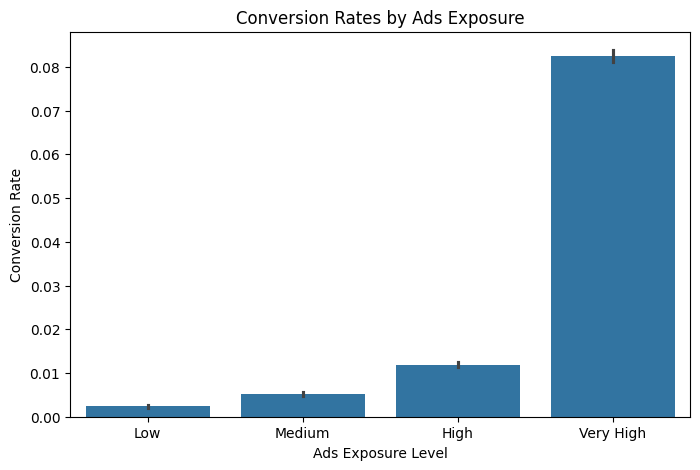

In [ ]:
# Plot conversion rates by ads exposure
plt.figure(figsize=(8, 5))
sns.barplot(x='ads_bin', y='converted', data=data)
plt.title('Conversion Rates by Ads Exposure')
plt.ylabel('Conversion Rate')
plt.xlabel('Ads Exposure Level')
plt.show()


In [ ]:
# Step 9: Additional Analysis - Distribution of most ads seen by day
print("\nStep 9: Additional Analysis - Distribution of Most Ads by Day")
print("-----------------------------------------------------------")
day_counts = data.groupby(['most ads day', 'test group']).size().unstack(fill_value=0)
print(day_counts)



Step 9: Additional Analysis - Distribution of Most Ads by Day
-----------------------------------------------------------
test group       ad   psa
most ads day             
Friday        88805  3803
Monday        83571  3502
Saturday      78802  2858
Sunday        82332  3059
Thursday      79077  3905
Tuesday       74572  2907
Wednesday     77418  3490


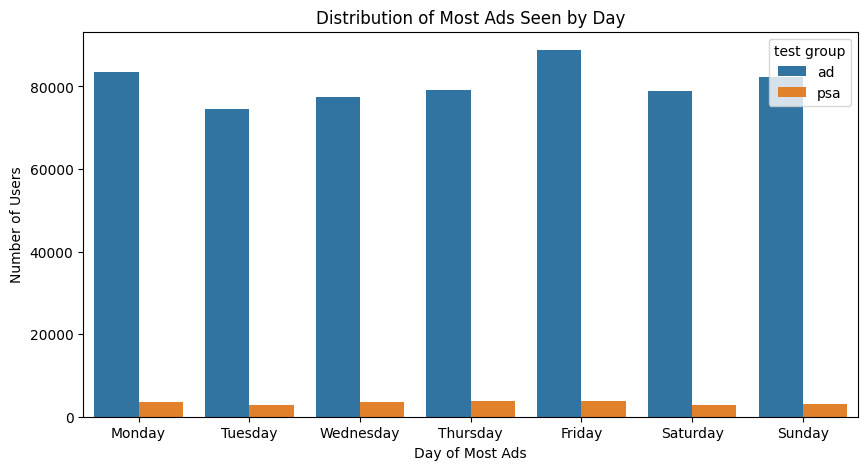

In [ ]:
# Plot distribution of most ads seen by day
plt.figure(figsize=(10, 5))
sns.countplot(x='most ads day', hue='test group', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Most Ads Seen by Day')
plt.xlabel('Day of Most Ads')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# Step 10: Additional Analysis - Average ads seen by group
avg_ads = data.groupby('test group')['total ads'].mean()
print("\nStep 10: Additional Analysis - Average Ads Seen by Group")
print("------------------------------------------------------")
print(avg_ads)


Step 10: Additional Analysis - Average Ads Seen by Group
------------------------------------------------------
test group
ad     24.823365
psa    24.761138
Name: total ads, dtype: float64


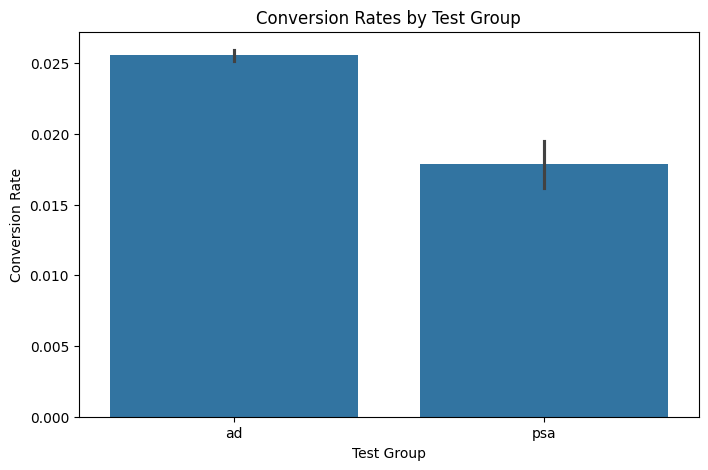

In [ ]:
# Plot conversion rates by test group
plt.figure(figsize=(8, 5))
sns.barplot(x='test group', y='converted', data=data)
plt.title('Conversion Rates by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.show()